In [1]:
from Triangle import Triangle

In [2]:
def gen_id(x, y, z):
    """Генератор id для треугольника"""
    return int(str(x) + str(y) + str(z))

In [3]:
class Node:
    def __init__(self, value, data=''):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1
        self.data = data

class AVLTree:
    '''AVLTree container is tree-type data structure with best time-complexity'''
    def __init__(self, *data):
        self.root = None
        self.index = 0
        if data != None:
            for el in data:
                self.insert(el)
    
    def insert(self, els):
        if not isinstance(els, list):
            self.insert_el(gen_id(els.side1,els.side2, els.side3), els)
            return
        for i in els:
            self.insert_el(gen_id(i.side1, i.side2, i.side3), i)
            
    def insert_el(self, value, data=''):
        self.root = self.insert_value(self.root, value, data)
        
    def insert_value(self, root, value, data):
        if not root:
            return Node(value, data)
        elif value < root.value:
            root.left = self.insert_value(root.left, value, data)
        else:
            root.right = self.insert_value(root.right, value, data)

        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and value < root.left.value:
            return self.right_rotate(root)
        
        # Left-Right rotation
        if balance > 1 and value > root.left.value:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and value > root.right.value:
            return self.left_rotate(root)
        
        # Right-Left rotation
        if balance < -1 and value < root.right.value:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)

        return root
    
    def height(self, node):
        if not node:
            return 0
        return node.height
    
    def balance(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def left_rotate(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self.height(z.left), self.height(z.right))
        y.height = 1 + max(self.height(y.left), self.height(y.right))

        return y

    def right_rotate(self, z):
        y = z.left
        T3 = y.right

        y.right = z
        z.left = T3

        z.height = 1 + max(self.height(z.left), self.height(z.right))
        y.height = 1 + max(self.height(y.left), self.height(y.right))

        return y

    def __delitem__(self, unique_id):
        self.delete_value(unique_id)
        
    def delete_value(self, value):
        self.root = self.delete(self.root, value)
        
    def delete(self, root, value):
        if not root:
            return root

        if value < root.value:
            root.left = self.delete(root.left, value)
        elif value > root.value:
            root.right = self.delete(root.right, value)
        else:
            if not root.left:
                temp = root.right
                root = None
                return temp
            elif not root.right:
                temp = root.left
                root = None
                return temp

            temp = self.min_value_node(root.right)
            root.value = temp.value
            root.right = self.delete(root.right, temp.value)

        if not root:
            return root

        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and self.balance(root.left) >= 0:
            return self.right_rotate(root)

        # Left-Right rotation
        if balance > 1 and self.balance(root.left) < 0:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        
        # Right rotation
        if balance < -1 and self.balance(root.right) <= 0:
            return self.left_rotate(root)

        # Right-Left rotation
        if balance < -1 and self.balance(root.right) > 0:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)

        return root
    
    
    def min_value_node(self, root):
        current = root
        while current.left:
            current = current.left
        return current
    
    def __getitem__(self, unique_id):
        return self.find(unique_id)
    
    def find(self, el):
        if isinstance(el, Triangle):
            return self.find_value(self.root, gen_id(el.side1,el.side2, el.side3))
        else:
            return self.find_value(self.root, el)
    
    def find_value(self, root, value):
        if not root or root.value == value:
            return root
        if root.value < value:
            return self.find_value(root.right, value)
        return self.find_value(root.left, value)

    def __contains__(self, item):
        return True if self.find(gen_id(item.side1, item.side2, item.side3)) != None else False

    def find_length(self, root):
        if not root:
            return 0
        return 1 + self.find_length(root.left) + self.find_length(root.right)
    
    def __repr__(self):
        l = []
        self.traverse(self.root, l)
        return ''.join(str(l))
        
    def __str__(self):
        l = []
        self.traverse(self.root, l)
        return f'Class SecondContainer with {len(self)} nodes.'
    
    def __len__(self):
        return self.find_length(self.root)

    def __setitem__(self, index, value):
        pass

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == len(self):
            raise StopIteration
        temp_l = []
        self.traverse(self.root, temp_l)
        data_to_ret = temp_l[self.index]
        self.index = self.index + 1
        return data_to_ret
    
    def traverse(self, node, save):
        if not node: return
        save.append((node.value, node.data))
        self.traverse(node.left, save)
        self.traverse(node.right, save)

    

Class tests below:
    - deletion (by index): passed
    - insertion (list of Point instances): passed
    - find (return index of element or len(container) if no element): passed
    - contains (find on steroids): passed
    - len (return number of elements in container): passed
    - str: passed
    - repr (some tech-info): passed
    - getitem (by index): passed
    - iter with next: passed

In [4]:
# Init
tr = AVLTree(Triangle(10, 8, 12), Triangle(12, 12, 12), Triangle(30, 45, 45))

In [5]:
# str() and representation
print(str(tr))
tr

Class SecondContainer with 3 nodes.


[(121212, Triangle(side1=12 side2=12 side3=12)), (10812, Triangle(side1=10 side2=8 side3=12)), (304545, Triangle(side1=30 side2=45 side3=45))]

In [6]:
# len
len(tr)

3

In [7]:
# getitem
tr[121212], type(tr[121212])

(<__main__.Node at 0x1e03a26b090>, __main__.Node)

In [8]:
# iterator with next()
tr_it = iter(tr)
if tr_it is not None:
    print(next(tr_it))
    print(next(tr_it))
    print(next(tr_it))

(121212, Triangle(side1=12 side2=12 side3=12))
(10812, Triangle(side1=10 side2=8 side3=12))
(304545, Triangle(side1=30 side2=45 side3=45))


In [9]:
# insertion
tr.insert(Triangle(12, 12, 12))
tr

[(121212, Triangle(side1=12 side2=12 side3=12)), (10812, Triangle(side1=10 side2=8 side3=12)), (304545, Triangle(side1=30 side2=45 side3=45)), (121212, Triangle(side1=12 side2=12 side3=12))]

In [10]:
# deletion
del tr[gen_id(12, 12, 12)]
tr

[(121212, Triangle(side1=12 side2=12 side3=12)), (10812, Triangle(side1=10 side2=8 side3=12)), (304545, Triangle(side1=30 side2=45 side3=45))]

In [11]:
# find and contains
print(f'''
find Triangle in class: {tr.find(Triangle(10, 8, 12))}
find Triangle not in class: {tr.find(Triangle(10, 6, 8))}
len of class: {len(tr)}
___________________________
contains (Triangle in class): {Triangle(10, 8, 12) in tr}
contains (Triangle not in class): {Triangle(10, 6, 8) in tr}
'''.strip())

find Triangle in class: <__main__.Node object at 0x000001E03A26B710>
find Triangle not in class: None
len of class: 3
___________________________
contains (Triangle in class): True
contains (Triangle not in class): False


In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [14]:
import timeit
import math
import random

In [19]:
plt.rcParams['figure.figsize'] = [10, 6]
def perform_bench(type_of_bench):
    ts = []
    if type_of_bench == 'insert':
        ns = np.linspace(1, 10_000, 10, dtype=int)
        for n in ns:
            measurements = []
            for _ in range(1000):
                c = AVLTree(*[Triangle(i, i, i) for i in range(1, n)])
                measurements = timeit.timeit(c.insert(Triangle(n, n, n)), number=1, globals=globals())
            ts.append(measurements)
    
    elif type_of_bench == 'delete':
        ns = np.linspace(1, 10_000, 10, dtype=int)
        for n in ns:
            measurements = []
            for _ in range(1000):
                c = AVLTree(*[Triangle(i, i, i) for i in range(1, n)])
                measurements = timeit.timeit('del c[{}]'.format(n - 1), number=1, globals=globals())
            ts.append(measurements)
            
    elif type_of_bench == 'find':
        ns = np.linspace(1, 10_000, 10, dtype=int)
        for n in ns:
            measurements = []
            for _ in range(1000):
                c = AVLTree(*[Triangle(i, i, i) for i in range(1, n)])
                measurements = timeit.timeit(c.find(Triangle(n, n, n)), number=1, globals=globals())
            ts.append(measurements)
    
    elif type_of_bench == 'contains':
        ns = np.linspace(1, 10_000, 10, dtype=int)
        for n in ns:
            measurements = []
            for _ in range(1000):
                c = AVLTree(*[Triangle(i, i, i) for i in range(1, n)])
                measurements = timeit.timeit(Triangle(n, n, n) in c, number=1, globals=globals())
            ts.append(measurements)
    
    std_devs = np.std(ts, axis=1)
    ts = np.mean(ts, axis=1)
    plt.errorbar(ns, ts, yerr=std_devs, fmt='-', capsize=5, color='blue')
    degree = 4
    coeffs = np.polyfit(ns, ts, degree)
    p = np.poly1d(coeffs)
    plt.plot(ns, [p(n) for n in ns], '-b')

In [21]:
perform_bench('insert')

ValueError: stmt is neither a string nor callable

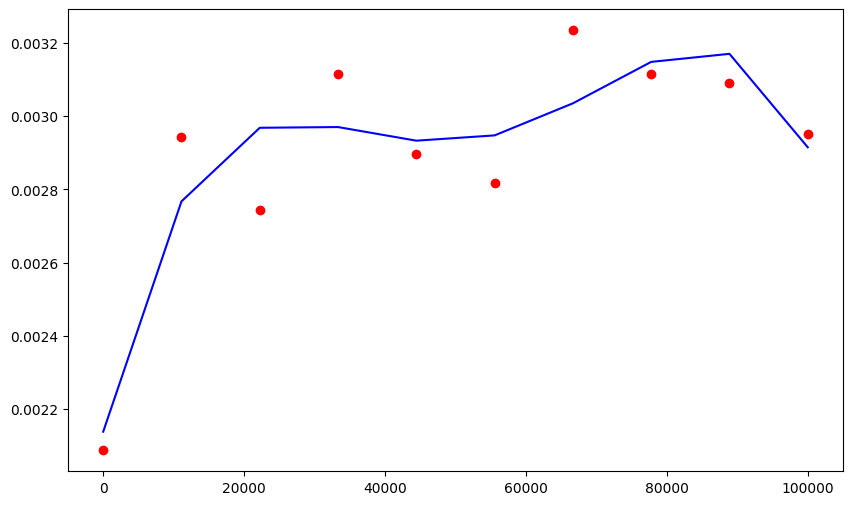

In [ ]:
perform_bench('find')

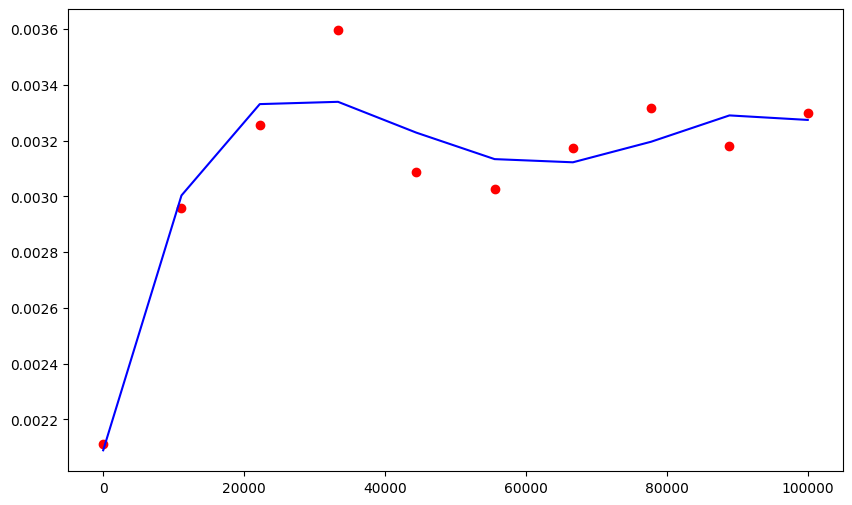

In [ ]:
perform_bench('contains')

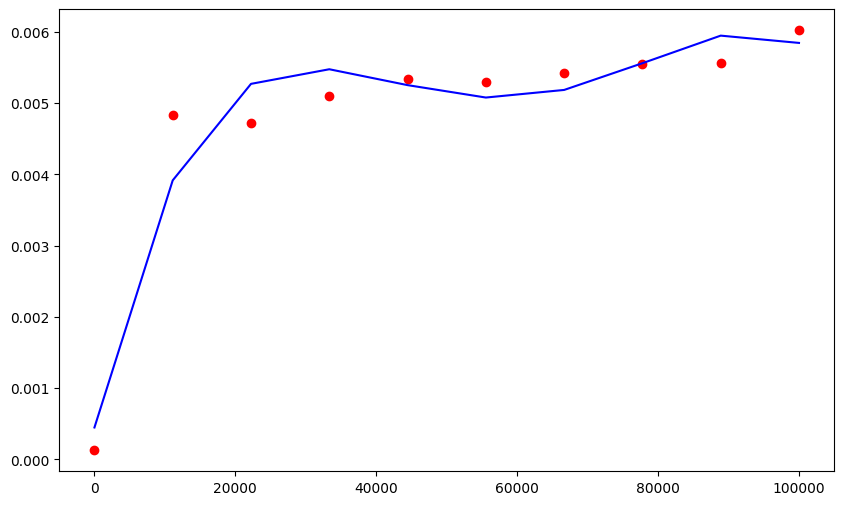

In [ ]:
perform_bench('delete')